In [12]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
import matplotlib.pylab as plt
from statsmodels.stats.weightstats import *
from statsmodels.stats.descriptivestats import *

In [5]:
data = pd.read_csv('mirror_mouses.txt', header=None)
data.columns = ['proportion_of_time']
data.head()

,proportion_of_time
0,0.348471
1,0.640620
2,0.549818
3,0.537454
4,0.400444


In [6]:
data.describe()

,proportion_of_time
count,16.000000
mean,0.475289
std,0.066065
min,0.348471
25%,0.444566
50%,0.477289
75%,0.488859
max,0.640620


(array([1., 1., 2., 1., 8., 0., 2., 0., 0., 1.]),
 array([0.3484705 , 0.37768547, 0.40690044, 0.43611541, 0.46533038,
        0.49454535, 0.52376032, 0.55297529, 0.58219026, 0.61140523,
        0.6406202 ]),
 <BarContainer object of 10 artists>)

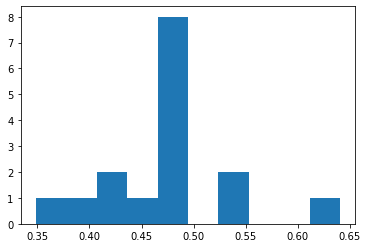

In [8]:
plt.hist(data.proportion_of_time)

In [10]:
#   Одновыборочные критерии
zconfint(data)

(array([0.44291783]), array([0.50765996]))

In [13]:
#   Критерий знаков
sign_test(data, .5)

(-5.0, 0.021270751953125)

In [14]:
#   Критерий знаковых рангов Вилкоксона
m0 = 0.5
stats.wilcoxon(data.proportion_of_time - m0)

WilcoxonResult(statistic=35.0, pvalue=0.09344482421875)

In [16]:
#   Перестановочный критерий
#   H0 - EX = 0.5
#   H1 - EX <=> 0.5

def permutation_t_stat_1sample(sample, mean):
    t_stat = sum(map(lambda x: x - mean, sample))
    return t_stat

def permutation_zero_distr_1sample(sample, mean, max_permutations=None):
    centered_sample = list(map(lambda x: x - mean, sample))
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size=(max_permutations, len(sample)))])
    else:
        signs_array = itertools.product([-1,1], repeat=len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

print(permutation_t_stat_1sample(data.proportion_of_time, .5))

-0.39537769999999994


(array([   62.,   453.,  1445.,  3132.,  5359.,  7695.,  9525., 10194.,
         9525.,  7695.,  5359.,  3132.,  1445.,   453.,    62.]),
 array([-0.8511611 , -0.73767295, -0.62418481, -0.51069666, -0.39720851,
        -0.28372037, -0.17023222, -0.05674407,  0.05674407,  0.17023222,
         0.28372037,  0.39720851,  0.51069666,  0.62418481,  0.73767295,
         0.8511611 ]),
 <BarContainer object of 15 artists>)

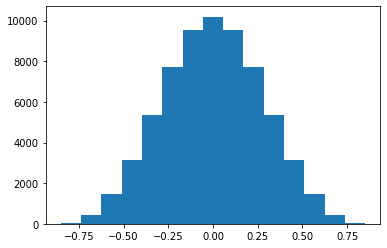

In [18]:
plt.hist(permutation_zero_distr_1sample(data.proportion_of_time, .5), bins=15)

In [19]:
def permutation_test(sample, mean, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError('Unknown alternative')
    t_stat = permutation_t_stat_1sample(sample, mean)
    zero_distr = permutation_zero_distr_1sample(sample, mean)
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0 for x in zero_distr]) / len(zero_distr)
    if alternative == 'less':
        return sum([1. if x<= t_stat else 0. for x in zero_distr]) / len(zero_distr)
    if alternative == 'greater':
        return sum([1. if x>= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [20]:
permutation_test(data.proportion_of_time, .5)

0.15777587890625